# OCR Label Detection

This is a demonstration of the image_str module, which allows you to identify specific labels on the International Space Station (ISS).

By providing a folder containing images or a specific image taken from the ISS panorama, image_str will analyze each image and generate a pandas database that includes all the labels found in the images. If you specify a result folder, a CSV file will be created, containing the labels and boundary boxes for each individual image. If you also provide a bagfile path associated with the images, the module will generate the 3D positions of each label. Additionally, a CSV file named "all_locations.csv" will be created, containing all the labels found in the images.

Alternatively, if you already have a generated CSV file, you can use it to construct a database for label searching purposes.

## Setup

In [1]:
import image_str.parse_img as parser
from matplotlib import pyplot as plt
import warnings
import pandas as pd
import os

warnings.filterwarnings('ignore')

Set the bagfile path of the ISS images. If no path is given, then the 3D location of the labels on the ISS would not be provided.

In [2]:
bag_path = "data/images/"
parser.set_bag_path(bag_path)

Set Astrobee Variables

In [3]:
os.environ["ASTROBEE_CONFIG_DIR"] = "/src/astrobee/src/astrobee/config"
os.environ["ASTROBEE_RESOURCE_DIR"] = "/src/astrobee/src/astrobee/resources"
os.environ["ASTROBEE_ROBOT"] = "queen"
os.environ["ASTROBEE_WORLD"] = "iss"

## Set Image Path or Folder

In [4]:
image_path = 'data/images/isaac_sci_cam_image_delayed/1657544487.355.jpg'
image_folder = 'data/images/isaac_sci_cam_image_delayed/'

## Set Result Folder

The result folder is where the results will be saved. If no result folder is provided, the database and images will not be saved to files.

In [5]:
result_folder = 'results/beehive/' 

## Get Label Database

Given an image path, result_folder, and path to trained craft model, the decode_image function will return a pandas database of the labels found. If increment parameter is true, then the result for each individual image will be saved to result folder. 

Functions will rewrite files already generated!

In [6]:
database = parser.parse_image(image_path, trained_model='data/model/craft_mlt_25k.pth', result_folder=result_folder, increment=True)

Using cache found in /root/.cache/torch/hub/baudm_parseq_main
0it [00:00, ?it/s]

Success


In [ ]:
database = parser.parse_folder(image_folder, trained_model='data/model/craft_mlt_25k.pth', result_folder=result_folder, increment=True)

Using cache found in /root/.cache/torch/hub/baudm_parseq_main
Parsing through Images:   3%|▎         | 6/231 [16:39<10:17:00, 164.54s/it]

If csv file is provided, generate database directly.

In [7]:
database = parser.df_from_file('results/beehive/all_locations.csv')
print(database)

                    label                                   PCL Intersection  \
0     officeJero-Dro-Oran  [1.23418, 0.169534, 3.81132, 0.0, -36.7904, 17...   
1                     OGK  [1.29886, 0.0379682, 3.84259, 0.0, -37.4861, -...   
2                     XIT  [-0.891542, 0.139165, 4.13076, 0.0, -12.3147, ...   
3                TangoLab  [1.90213, -0.110923, 4.0421, 0.0, -47.2248, -1...   
4                   EMER:  [-0.802518, -0.57303, 4.01507, 0.0, -14.1141, ...   
...                   ...                                                ...   
8304                    W  [4.91789, 0.0104886, 5.83727, 0.0, 72.9315, -1...   
8305                  GMT  [4.95067, 0.0399328, 5.83893, 0.0, 71.9031, -1...   
8306                  FOR  [4.94819, 0.0492291, 5.84951, 0.0, 72.1901, -1...   
8307                12VDC  [5.00488, 0.216493, 5.8331, 0.0, 69.3931, 12.1...   
8308             Attached  [5.10708, -0.117182, 5.70119, 0.0, 60.1035, -2...   

     Mesh Intersection                 

## Find Specific Label

Given the database, you can search for a specific label. find_panorama will return three lists: full, crop, and locations. full contains images with all the specified labels boxed. crop contains cropped images with the labels and locations contains arrays with the 3D positions of the labels. locations will be None if database does not contain 3D locations.

Searching for Drawer: 100%|██████████| 16/16 [00:24<00:00,  1.52s/it]


Location 0
 Position (x, y, z): [3.94963 1.0603  5.24398]
 Orientation (roll, pitch, yaw): [  0.      15.3932 122.915 ]

Location 1
 Position (x, y, z): [3.60883  0.955593 5.19041 ]
 Orientation (roll, pitch, yaw): [ 0.     20.7451 88.4179]

Location 2
 Position (x, y, z): [ 3.29146 -1.05009  4.80929]
 Orientation (roll, pitch, yaw): [   0.        -6.06673 -109.398  ]

Location 3
 Position (x, y, z): [ 3.36493  -0.720927  4.84158 ]
 Orientation (roll, pitch, yaw): [   0.        -5.90127 -112.247  ]

Location 4
 Position (x, y, z): [3.66959   0.0320554 4.83287  ]
 Orientation (roll, pitch, yaw): [   0.        -5.26429 -108.356  ]

Location 5
 Position (x, y, z): [3.81368 1.04884 5.26487]
 Orientation (roll, pitch, yaw): [  0.      16.0275 131.136 ]

Location 6
 Position (x, y, z): [3.99961 1.06886 5.27801]
 Orientation (roll, pitch, yaw): [  0.      16.6104 123.527 ]

Location 7
 Position (x, y, z): [3.79603 1.05957 5.2726 ]
 Orientation (roll, pitch, yaw): [  0.      15.9814 131.195 ]


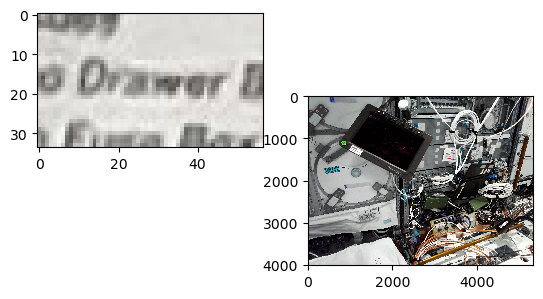

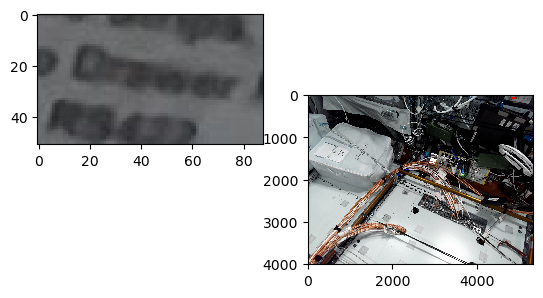

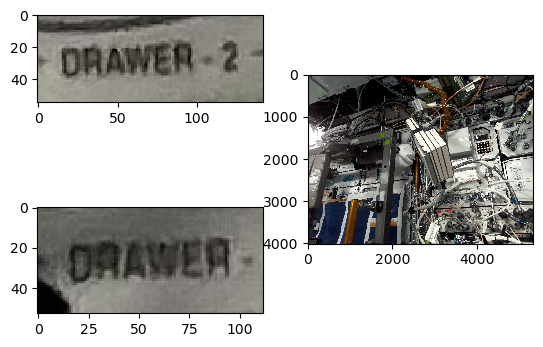

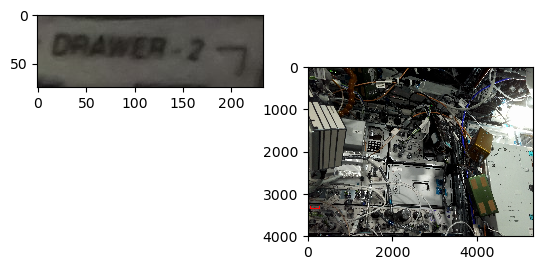

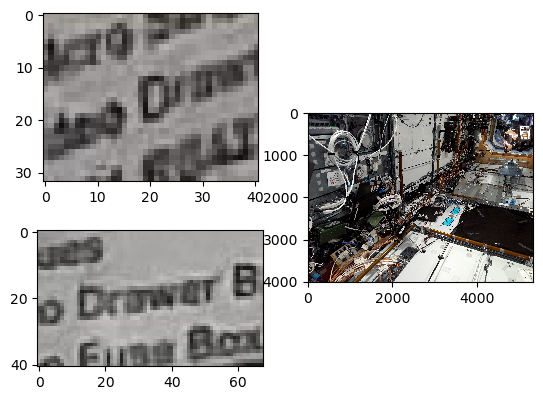

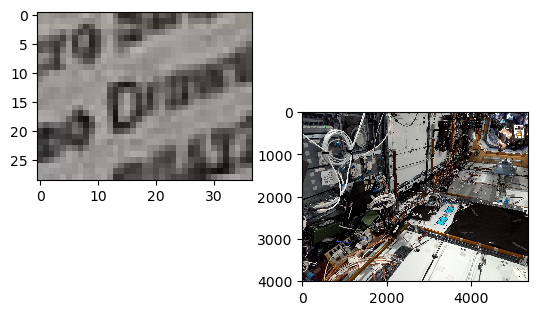

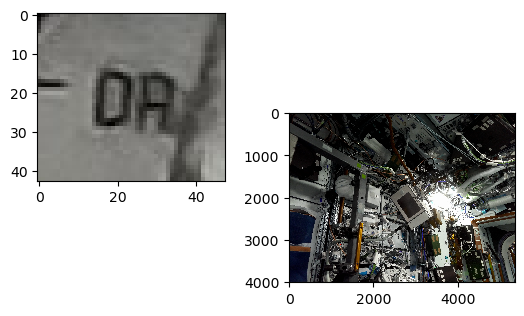

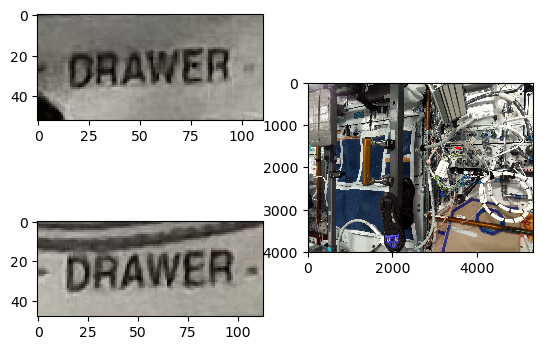

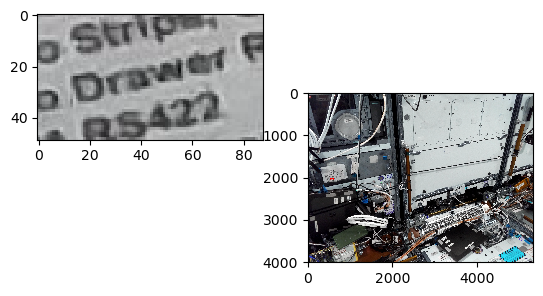

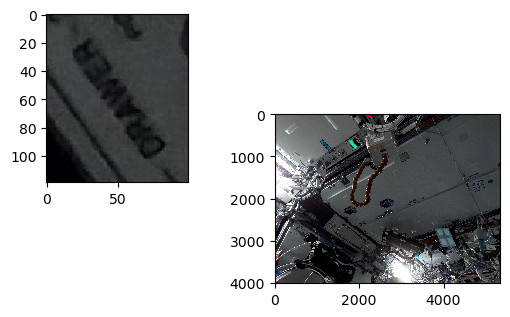

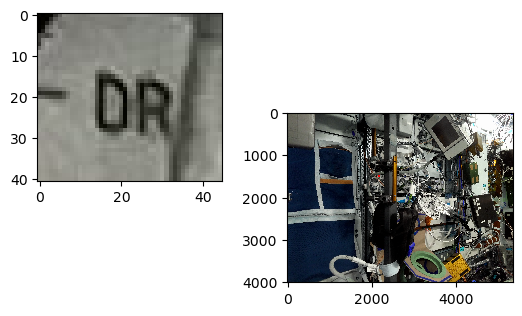

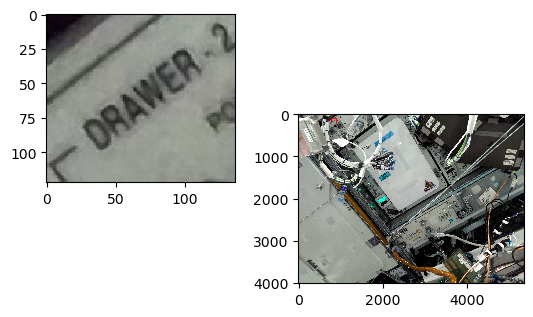

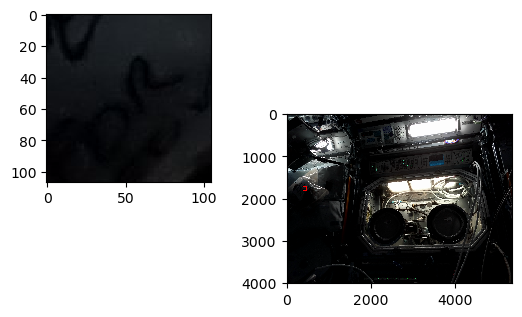

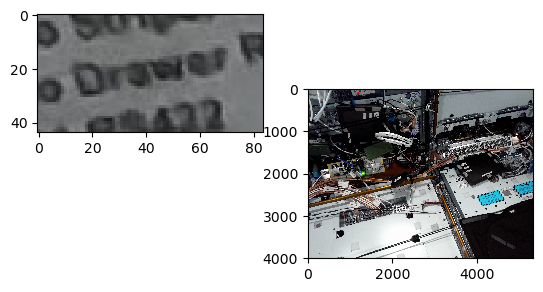

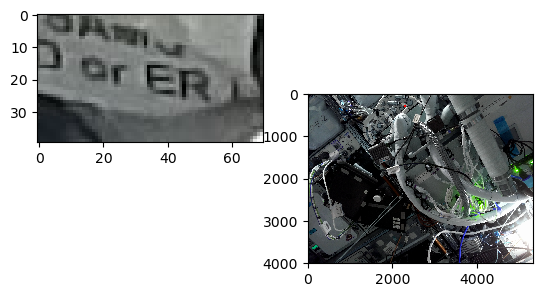

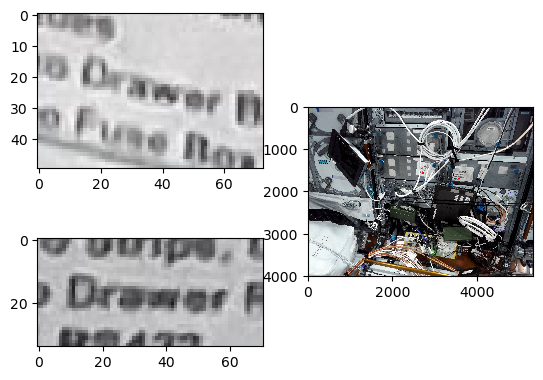

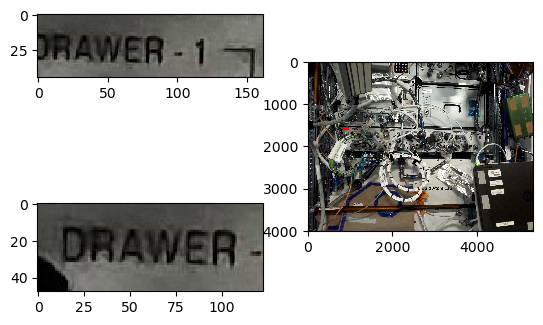

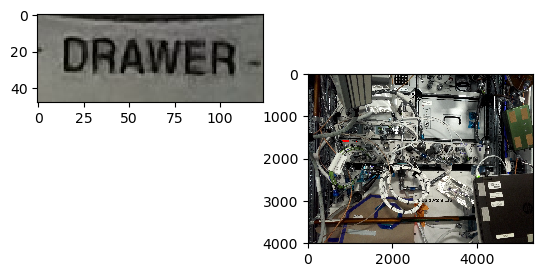

In [11]:
label = 'Drawer'
full, crop, locations = parser.find_panorama(database, label)

If you only want to display the cropped images or the full images, use the display_images function.

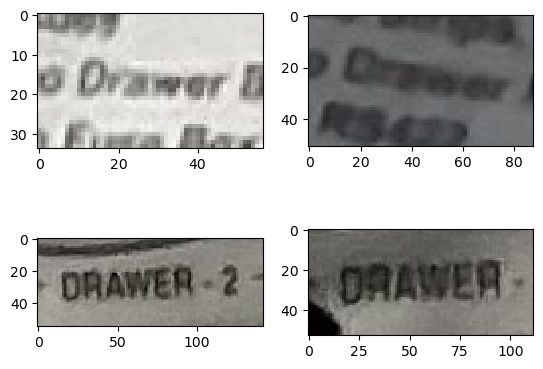

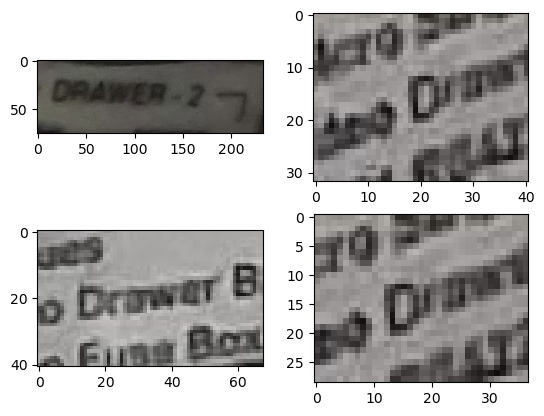

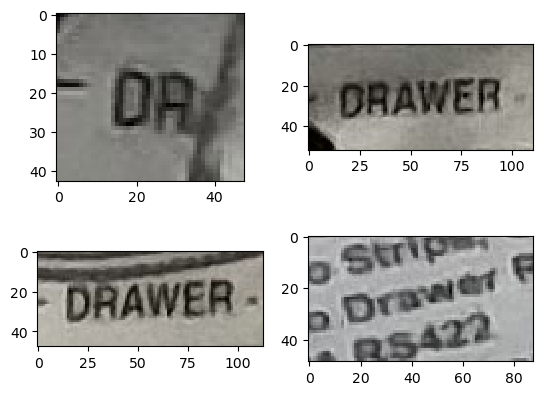

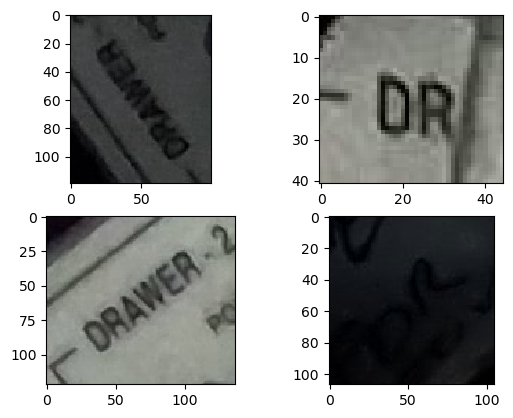

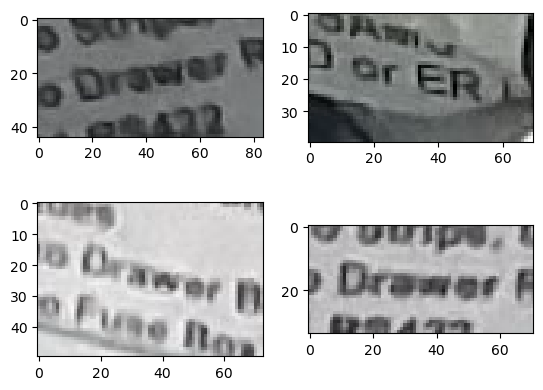

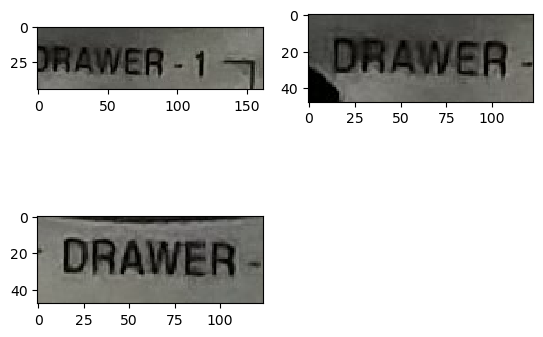

In [12]:
parser.display_images(crop)

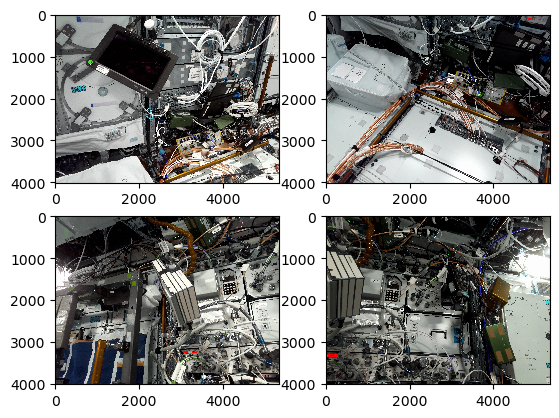

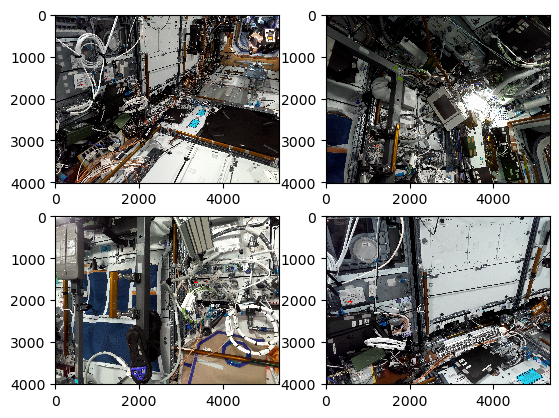

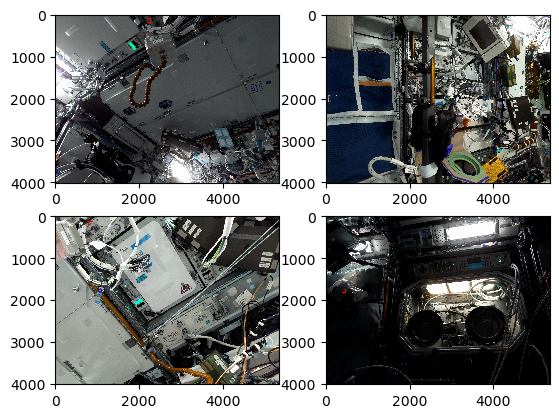

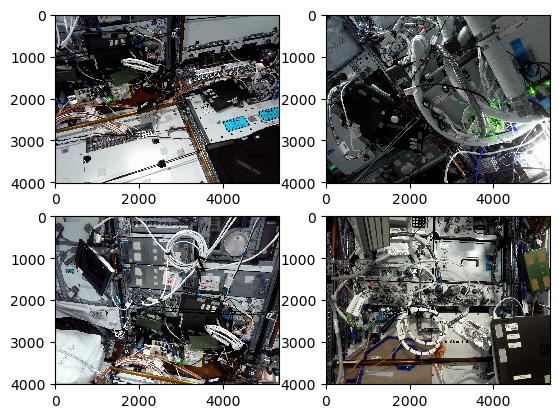

In [13]:
parser.display_images(full)